# Introdução

Este notebook foi criado para armazenar as informações mais importantes do curso

##### Projeto Call 911
Este projeto foi baseado em um dataframe do kaggle onde os operadores registravam as ligações de emergência para o 911

##### importes básicos

In [1]:
import numpy as np
import pandas as pd

##### matplot lib para funcionar no jupter

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [7]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1



Analisando a coluna title vemos três valores em destaque

In [10]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

#### Função Lambda

Olhando a estrutura do dataframe na coluna title ver-se a possibilidade de subdividir a coluna em mais termos visto que antes dos dois pontos existe 3 variações ("EMS", "Fire" e "Traffic"). Para tanto se faz necessário aplicar uma função split na coluna interira. Tal aplicação é possivel utilizando a função apply do pandas em conjunto com a função lambda.

In [4]:
df['oneTitle'] = df['title'].apply(lambda title: title.split(':')[0])

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,oneTitle
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


A coluna timeStamp informa a cronologia do dataframe. Se faz necessário transforma-la em informação de tempo para manitupa-la

In [16]:
type(df["timeStamp"][0])

str

In [5]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

Com a conversão para datetime é possivel extrair vários 

In [20]:
type(df["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Vamos criar uma nova coluna apenas com a data 



In [6]:
df["date"] = df["timeStamp"].apply(lambda x:x.date())

com isso se torna mais fácil vizualizar os dados

<AxesSubplot:xlabel='date'>

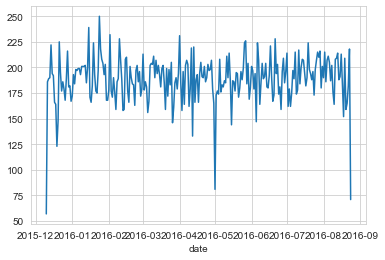

In [26]:
df[df["oneTitle"] == "EMS"].groupby("date").count()["twp"].plot()   

# função groupby

criando algumas colunas com informações cronológicas utilizando  datetime

In [25]:
df["Hour"] = df["timeStamp"].apply(lambda x:x.hour)
df["Month"] = df["timeStamp"].apply(lambda x:x.month)
df["Day of Week"] = df["timeStamp"].apply(lambda x:x.dayofweek)


In [13]:
df["Hour"].head()

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

Observe o agrupamento do índice Month e a sua contagem a cada mês

In [18]:
byMonth = df.groupby("Month").count()
byMonth.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,oneTitle,date,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


Ao realizar o agrupamento por dia da semana notice que os dias da semana variam de 0 a 6, para utilizar o nome de cada dia pode-se usar uma lista dicionário e subistituir os valores de day of week

In [17]:
byDay = df.groupby("Day of Week").count()
byDay.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,oneTitle,date,Hour,Month
Day of Week,,,,,,,,,,,,,
0,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680,14680
1,15150,15150,15150,13207,15150,15150,15143,15057,15150,15150,15150,15150,15150
2,14879,14879,14879,13030,14879,14879,14868,14794,14879,14879,14879,14879,14879
3,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478,14478
4,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833,14833
5,13336,13336,13336,11612,13336,13336,13330,13234,13336,13336,13336,13336,13336
6,12136,12136,12136,10558,12136,12136,12130,12095,12136,12136,12136,12136,12136


In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
df["Day of Week"]=df["Day of Week"].map(dmap) 

In [30]:
df["Day of Week"]

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

#### Gráficos

<AxesSubplot:xlabel='oneTitle', ylabel='count'>

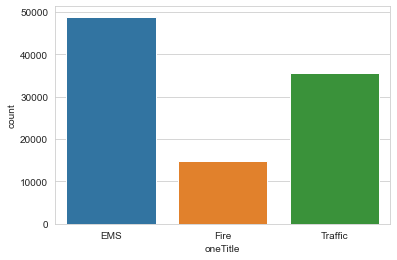

In [32]:
sns.countplot(x="oneTitle",data=df)

<AxesSubplot:xlabel='date'>

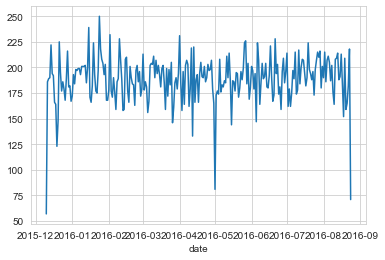

In [34]:
df[df["oneTitle"] == "EMS"].groupby("date").count()["twp"].plot()  

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

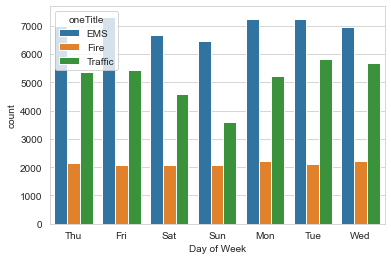

In [39]:
sns.countplot(x="Day of Week",data=df, hue="oneTitle")

# Groupby parametro by

indexa dois parametros e utilizado em conjuntocom o unstack permite organizar os valores entre linhas e colunas e não só em linhas (observar o dataframe sem o .unstack) isso permite a criação do mapa de calor e o clustermap

In [49]:
dayHour = df.groupby(by=["Day of Week","Hour"]).count()["twp"].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

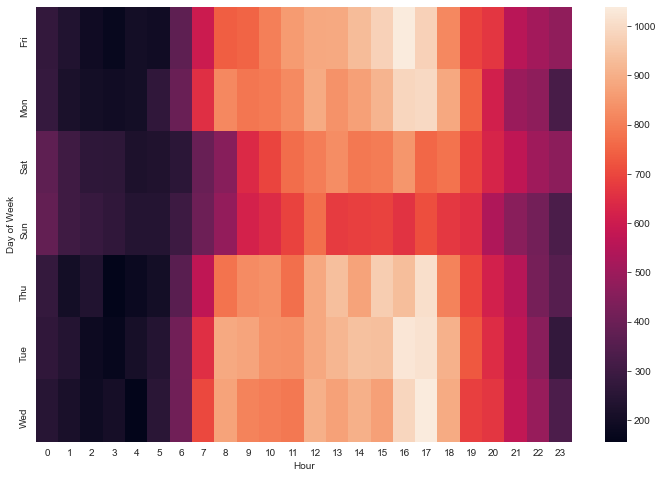

In [50]:

plt.figure(figsize=(12,8))
sns.heatmap(dayHour)

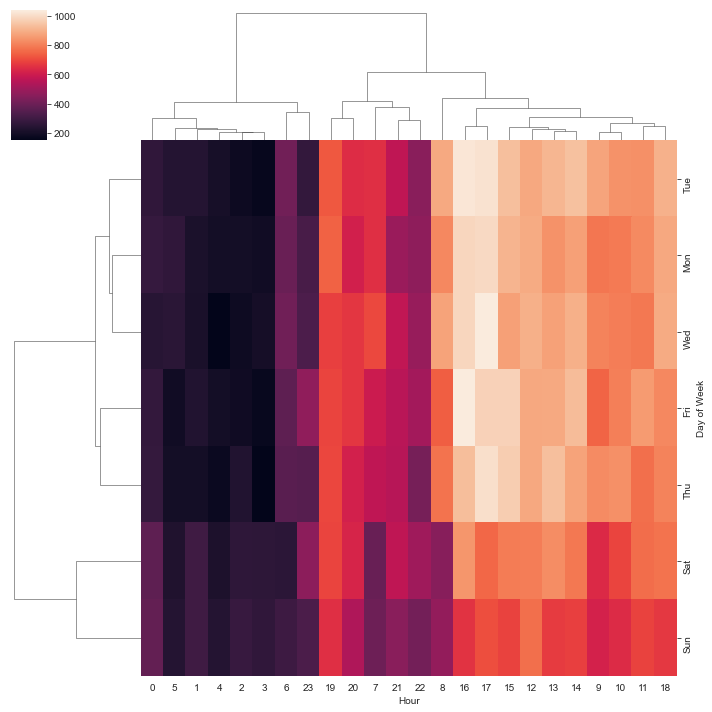

In [51]:
sns.clustermap(dayHour)